### Yolo python-style + ClearML logging

In [ ]:
!pip install clearml clearml-agent ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 24.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [ ]:
# !unzip content/MyDrive/yolo/object_detection.zip

In [ ]:
from clearml import Task
from ultralytics import YOLO

In [ ]:
! export MPLBACKEND=TkAg

In [ ]:
from clearml import Task

web_server = 'https://app.clear.ml'
api_server = 'https://api.clear.ml'
files_server = 'https://files.clear.ml'
access_key = 'WJZD3WESRA1QXDV6S4ZP'
secret_key = 'bSku3TCUfi5O9idajhTld0qcD98rudNuz8oRRgu5RoRFcsn5KN'

Task.set_credentials(web_host=web_server,
                     api_host=api_server,
                     files_host=files_server,
                     key=access_key,
                     secret=secret_key
                     )

In [ ]:
!clearml-agent daemon --queue default

Using environment access key CLEARML_API_ACCESS_KEY=WJZD3WESRA1QXDV6S4ZP
Using environment secret key CLEARML_API_SECRET_KEY=********
Current configuration (clearml_agent v1.5.2, location: None):
----------------------
agent.worker_id = 
agent.worker_name = 1878aaf10463
agent.force_git_ssh_protocol = false
agent.python_binary = 
agent.package_manager.type = pip
agent.package_manager.pip_version.0 = <20.2 ; python_version < '3.10'
agent.package_manager.pip_version.1 = <22.3 ; python_version >\= '3.10'
agent.package_manager.system_site_packages = false
agent.package_manager.force_upgrade = false
agent.package_manager.conda_channels.0 = pytorch
agent.package_manager.conda_channels.1 = conda-forge
agent.package_manager.conda_channels.2 = defaults
agent.package_manager.priority_optional_packages.0 = pygobject
agent.package_manager.torch_nightly = false
agent.package_manager.poetry_files_from_repo_working_dir = false
agent.venvs_dir = /root/.clearml/venvs-builds
agent.venvs_cache.max_entries

In [ ]:
task = Task.init(
    project_name="training_yolov8",
    task_name="training_yolov8"
)

model_variant = "yolo8m"
task.set_parameter("model_variant", model_variant)

model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 140MB/s]


In [ ]:
args = dict(
   imgsz=1280,
   epochs=100,
   batch=8,
   data='data.yaml',
   name=f'{model_variant}_custom'
)

task.connect(args)

{'imgsz': 1280,
 'epochs': 100,
 'batch': 8,
 'data': 'data.yaml',
 'name': 'yolo8m_custom'}

In [ ]:
model.train(**args)

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=100, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8m_custom, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, 

2023-05-18 18:38:29,573 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias
train: Scanning /content/train/labels... 599 images, 1 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<00:00, 1963.94it/s]
train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/valid/labels... 156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<00:00, 827.16it/s]
val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/yolo8m_custom/labels.jpg... 
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/yolo8m_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      13.9G       2.13      2.869      2.831         29     

2023-05-18 18:39:26,741 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      1/100      13.9G      1.936      2.305      2.548         20       1280: 100%|██████████| 75/75 [01:17<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]
                   all        156        196      0.612      0.735      0.648      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100        14G      1.564      1.571      2.025         34       1280:  15%|█▍        | 11/75 [00:11<01:07,  1.05s/it]

2023-05-18 18:40:22,585 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      2/100        14G      1.466      1.423      1.955         22       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                   all        156        196       0.62      0.714      0.702      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/100        14G      1.473      1.358          2         30       1280:  39%|███▊      | 29/75 [00:30<00:47,  1.04s/it]

2023-05-18 18:42:09,572 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      3/100        14G      1.435      1.326      1.939         27       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]
                   all        156        196      0.518      0.582      0.499      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/100        14G      1.575       1.15      1.886         30       1280:   4%|▍         | 3/75 [00:03<01:12,  1.01s/it]

2023-05-18 18:43:08,306 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      4/100      14.1G      1.498      1.268      1.963         21       1280:  81%|████████▏ | 61/75 [01:03<00:15,  1.07s/it]

2023-05-18 18:44:09,501 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      4/100      14.1G       1.51      1.266      1.974         27       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]
                   all        156        196      0.441      0.474      0.386      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/100      14.1G       1.48      1.267      2.007         19       1280:  59%|█████▊    | 44/75 [00:45<00:31,  1.02s/it]

2023-05-18 18:45:18,543 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      5/100      14.1G      1.482      1.299      2.007         25       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]
                   all        156        196      0.552       0.75      0.683       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/100      14.1G      1.453       1.28      1.919         30       1280:  59%|█████▊    | 44/75 [00:45<00:32,  1.04s/it]

2023-05-18 18:46:45,624 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      6/100      14.1G      1.435      1.289      1.919         21       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]
                   all        156        196      0.513      0.347      0.353      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      14.1G       1.53      1.214      1.934         32       1280:  21%|██▏       | 16/75 [00:16<01:01,  1.04s/it]

2023-05-18 18:47:42,308 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      7/100      14.1G      1.487       1.25      1.978         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]
                   all        156        196       0.42      0.517      0.385      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100        14G      1.517      1.299      1.953         27       1280:  32%|███▏      | 24/75 [00:25<00:54,  1.06s/it]

2023-05-18 18:49:17,324 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      8/100        14G       1.44       1.24      1.944         15       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]
                   all        156        196      0.536      0.637      0.574       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100        14G      1.408      1.163      1.957         23       1280:  39%|███▊      | 29/75 [00:29<00:49,  1.08s/it]

2023-05-18 18:50:47,326 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


      9/100        14G       1.41      1.182      1.948         24       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                   all        156        196      0.679      0.699      0.696       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/100        14G      1.416      1.205      2.005         18       1280:  16%|█▌        | 12/75 [00:12<01:06,  1.05s/it]

2023-05-18 18:51:55,501 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     10/100        14G      1.389      1.161       1.94         28       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]
                   all        156        196      0.624      0.679      0.666       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/100      14.1G      1.302      1.021      1.894         23       1280:   8%|▊         | 6/75 [00:06<01:10,  1.03s/it]

2023-05-18 18:53:16,845 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     11/100      14.1G      1.368      1.105      1.951         20       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                   all        156        196        0.7      0.704      0.715       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/100      14.1G      1.294      1.036       1.87         27       1280:  15%|█▍        | 11/75 [00:11<01:06,  1.04s/it]

2023-05-18 18:54:48,589 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     12/100      14.1G        1.3      1.062      1.865         29       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]
                   all        156        196      0.738      0.679      0.738      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/100      14.1G      1.399      1.178      1.945         21       1280:  16%|█▌        | 12/75 [00:12<01:05,  1.05s/it]

2023-05-18 18:56:17,011 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     13/100      14.1G      1.348      1.049      1.881         22       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                   all        156        196      0.656      0.719      0.696      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/100      14.1G       1.27     0.9989      1.812         25       1280:  64%|██████▍   | 48/75 [00:50<00:28,  1.05s/it]

2023-05-18 18:58:19,696 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     14/100      14.1G      1.276      1.003      1.819         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]
                   all        156        196      0.667      0.714       0.71      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/100      14.1G      1.244      1.047      1.827         20       1280:  32%|███▏      | 24/75 [00:24<00:53,  1.05s/it]

2023-05-18 18:59:21,960 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     15/100      14.1G      1.288      1.031      1.835         22       1280: 100%|██████████| 75/75 [01:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                   all        156        196      0.774       0.77      0.795      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/100        14G      1.216     0.9359      1.781         21       1280:  15%|█▍        | 11/75 [00:11<01:05,  1.03s/it]

2023-05-18 19:00:35,942 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     16/100        14G      1.256     0.9925       1.81         38       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 9/10 [00:06<00:00,  1.42it/s]

2023-05-18 19:01:49,361 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
                   all        156        196      0.757      0.653      0.739      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     17/100        14G      1.276      1.029      1.815         27       1280:  89%|████████▉ | 67/75 [01:09<00:08,  1.04s/it]

2023-05-18 19:03:00,442 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     17/100        14G      1.276      1.022      1.809         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                   all        156        196      0.711      0.724      0.734      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/100        14G      1.247      1.018      1.774         18       1280:  79%|███████▊  | 59/75 [01:02<00:17,  1.07s/it]

2023-05-18 19:04:18,412 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     18/100        14G      1.235          1      1.777         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]
                   all        156        196      0.729      0.713      0.718      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/100        14G      1.208     0.9619      1.741         23       1280:  49%|████▉     | 37/75 [00:38<00:40,  1.08s/it]

2023-05-18 19:05:21,918 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     19/100        14G      1.202     0.9562       1.75         29       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]
                   all        156        196      0.767      0.684      0.784      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/100      14.1G       1.26     0.9154      1.786         18       1280:  61%|██████▏   | 46/75 [00:47<00:30,  1.04s/it]

2023-05-18 19:06:56,975 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     20/100      14.1G      1.199     0.8763      1.738         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]
                   all        156        196      0.803      0.735      0.813      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/100        14G      1.191     0.8617      1.726         26       1280:  67%|██████▋   | 50/75 [00:52<00:26,  1.07s/it]

2023-05-18 19:08:27,935 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     21/100        14G      1.187     0.8533      1.723         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]
                   all        156        196      0.624      0.638      0.572      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/100        14G      1.207     0.8969      1.742         23       1280:  35%|███▍      | 26/75 [00:26<00:51,  1.05s/it]

2023-05-18 19:09:29,462 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     22/100        14G      1.172     0.8699      1.718         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]
                   all        156        196       0.67      0.757      0.739      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/100        14G      1.124     0.8208      1.663         29       1280:  55%|█████▍    | 41/75 [00:43<00:36,  1.08s/it]

2023-05-18 19:11:12,258 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     23/100        14G      1.118     0.8043      1.681         29       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]
                   all        156        196      0.804      0.713      0.796      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/100        14G      1.131     0.8452      1.683         31       1280:  49%|████▉     | 37/75 [00:38<00:38,  1.02s/it]

2023-05-18 19:12:33,787 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     24/100        14G      1.117     0.8179      1.655         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                   all        156        196      0.717      0.725      0.754      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     25/100        14G      1.135     0.8572       1.73         23       1280:  29%|██▉       | 22/75 [00:22<00:55,  1.05s/it]

2023-05-18 19:13:43,834 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     25/100        14G      1.127     0.8207      1.681         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]
                   all        156        196      0.806      0.781      0.814      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/100        14G      1.015     0.7456      1.628         38       1280:   3%|▎         | 2/75 [00:02<01:15,  1.04s/it]

2023-05-18 19:14:50,234 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     26/100        14G      1.134      0.793      1.701         20       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                   all        156        196      0.704      0.684      0.688      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/100        14G      1.094     0.7867      1.609         22       1280:  11%|█         | 8/75 [00:08<01:11,  1.07s/it]

2023-05-18 19:16:21,718 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     27/100        14G      1.105     0.8033      1.644         38       1280:  89%|████████▉ | 67/75 [01:09<00:08,  1.05s/it]

2023-05-18 19:17:22,735 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     27/100        14G      1.095     0.7928      1.646         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]
                   all        156        196      0.805      0.736      0.782      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100        14G      1.108     0.8163      1.656         25       1280:  59%|█████▊    | 44/75 [00:46<00:34,  1.10s/it]

2023-05-18 19:18:26,576 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     28/100        14G      1.093     0.8028       1.66         26       1280: 100%|██████████| 75/75 [01:19<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
                   all        156        196      0.807      0.714      0.772      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/100      14.1G      1.132     0.8227      1.659         21       1280:  61%|██████▏   | 46/75 [00:47<00:30,  1.05s/it]

2023-05-18 19:19:54,202 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     29/100      14.1G      1.104     0.7921      1.629         21       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]
                   all        156        196      0.787      0.755      0.789      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/100      14.1G      1.099     0.7788      1.651         23       1280:  96%|█████████▌| 72/75 [01:15<00:03,  1.06s/it]

2023-05-18 19:21:48,056 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     30/100      14.1G      1.097     0.7788       1.65         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                   all        156        196      0.778      0.715      0.798      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/100      14.1G      1.041     0.7523      1.597         27       1280:  65%|██████▌   | 49/75 [00:51<00:26,  1.03s/it]

2023-05-18 19:22:50,422 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     31/100      14.1G      1.051     0.7401      1.607         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]
                   all        156        196      0.745       0.73      0.747      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/100        14G      1.046     0.7279      1.614         24       1280:  61%|██████▏   | 46/75 [00:47<00:29,  1.02s/it]

2023-05-18 19:24:12,872 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     32/100        14G      1.037     0.7261      1.614         22       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]
                   all        156        196      0.797      0.781      0.829      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/100      14.1G       1.01     0.7037       1.57         29       1280:  37%|███▋      | 28/75 [00:29<00:50,  1.07s/it]

2023-05-18 19:25:22,018 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     33/100      14.1G       1.03      0.735      1.602         20       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                   all        156        196      0.852      0.816      0.841      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/100        14G      1.005     0.7361      1.597         18       1280:  32%|███▏      | 24/75 [00:24<00:52,  1.02s/it]

2023-05-18 19:26:44,602 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     34/100        14G      1.011     0.7375      1.584         25       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]
                   all        156        196      0.815      0.811      0.859       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/100      14.1G      1.013     0.7039      1.635         26       1280:  15%|█▍        | 11/75 [00:11<01:06,  1.04s/it]

2023-05-18 19:27:56,791 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     35/100      14.1G     0.9726     0.7049       1.56         24       1280:  93%|█████████▎| 70/75 [01:13<00:05,  1.05s/it]

2023-05-18 19:28:59,151 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     35/100      14.1G     0.9682     0.7012      1.554         20       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                   all        156        196      0.887      0.757       0.84      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/100      14.1G     0.9712     0.6881       1.53         28       1280:  95%|█████████▍| 71/75 [01:14<00:04,  1.02s/it]

2023-05-18 19:30:25,532 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     36/100      14.1G     0.9688     0.6849      1.526         26       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
                   all        156        196      0.889       0.74      0.823      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/100        14G     0.9953      0.701      1.547         29       1280:  83%|████████▎ | 62/75 [01:04<00:13,  1.03s/it]

2023-05-18 19:31:42,770 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     37/100        14G      1.002     0.7066      1.539         22       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]
                   all        156        196      0.738       0.74      0.727      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/100        14G      1.016     0.7137      1.577         28       1280:  67%|██████▋   | 50/75 [00:52<00:26,  1.06s/it]

2023-05-18 19:32:56,683 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     38/100        14G          1     0.7206      1.575         29       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]
                   all        156        196      0.868      0.806      0.833      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/100        14G     0.9507     0.6723      1.564         24       1280:  23%|██▎       | 17/75 [00:17<01:00,  1.05s/it]

2023-05-18 19:33:48,090 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     39/100        14G       0.95     0.6858      1.519         28       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]
                   all        156        196      0.725      0.714      0.758       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/100        14G     0.9892     0.6902      1.551         23       1280:  23%|██▎       | 17/75 [00:17<01:00,  1.04s/it]

2023-05-18 19:35:14,651 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     40/100        14G       0.96      0.667      1.527         18       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 3/10 [00:02<00:04,  1.55it/s]

2023-05-18 19:36:16,592 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                   all        156        196      0.801      0.699      0.786      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/100        14G     0.9282     0.6471      1.522         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
                   all        156        196      0.788      0.816      0.801       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/100        14G     0.9373      0.674      1.519         21       1280:  35%|███▍      | 26/75 [00:26<00:52,  1.08s/it]

2023-05-18 19:38:15,819 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     42/100        14G      0.945     0.6496      1.487         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
                   all        156        196      0.781      0.811      0.833      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/100        14G     0.9378     0.6152      1.498         23       1280:  21%|██▏       | 16/75 [00:16<01:00,  1.03s/it]

2023-05-18 19:39:31,244 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     43/100        14G     0.9123     0.6415      1.472         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 5/10 [00:03<00:03,  1.55it/s]

2023-05-18 19:40:37,441 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]
                   all        156        196      0.806      0.719      0.753       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/100      14.1G     0.8923     0.6414      1.447         32       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                   all        156        196      0.829      0.791      0.851      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/100      14.1G     0.9587     0.5688      1.329         18       1280:   4%|▍         | 3/75 [00:03<01:16,  1.07s/it]

2023-05-18 19:42:11,868 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     45/100      14.1G     0.9028     0.6211      1.488         27       1280:  81%|████████▏ | 61/75 [01:03<00:14,  1.03s/it]

2023-05-18 19:43:12,435 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     45/100      14.1G     0.8989     0.6101      1.487         25       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]
                   all        156        196      0.812      0.816      0.834      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/100      14.1G     0.9164     0.6443      1.487         25       1280:  55%|█████▍    | 41/75 [00:43<00:35,  1.06s/it]

2023-05-18 19:44:18,721 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     46/100      14.1G     0.8851     0.6266       1.45         32       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                   all        156        196      0.828      0.816      0.833      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/100      14.1G     0.8632     0.5997      1.447         26       1280:  63%|██████▎   | 47/75 [00:48<00:29,  1.04s/it]

2023-05-18 19:45:50,797 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     47/100      14.1G     0.8643     0.5933      1.434         28       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]
                   all        156        196       0.75      0.765      0.763      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/100        14G     0.8636      0.585      1.416         28       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/10 [00:00<?, ?it/s]

2023-05-18 19:47:47,738 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
                   all        156        196      0.788       0.77      0.807      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/100        14G     0.8656     0.6005      1.429         20       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 4/10 [00:03<00:04,  1.32it/s]

2023-05-18 19:49:16,178 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]
                   all        156        196      0.745      0.806      0.798      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/100      14.1G     0.8319     0.5707      1.415         24       1280:  99%|█████████▊| 74/75 [01:17<00:01,  1.09s/it]

2023-05-18 19:50:38,732 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     50/100      14.1G     0.8336     0.5734      1.417         19       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]
                   all        156        196      0.819      0.764      0.817      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/100      14.1G     0.8243     0.5721      1.384         22       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]
                   all        156        196      0.821       0.82      0.843      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/100        14G     0.8307      0.554      1.377         24       1280:   5%|▌         | 4/75 [00:04<01:13,  1.04s/it]

2023-05-18 19:52:17,711 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     52/100        14G      0.811     0.5728      1.387         26       1280:  80%|████████  | 60/75 [01:02<00:15,  1.03s/it]

2023-05-18 19:53:16,847 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     52/100        14G     0.8185     0.5761      1.389         23       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]
                   all        156        196       0.78      0.794      0.818      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/100        14G     0.8505     0.5893      1.391         20       1280:  76%|███████▌  | 57/75 [01:00<00:19,  1.07s/it]

2023-05-18 19:54:39,723 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     53/100        14G     0.8282     0.5763      1.379         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                   all        156        196       0.88      0.842      0.864      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/100      14.1G     0.7974     0.5497       1.35         27       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 7/10 [00:04<00:02,  1.33it/s]

2023-05-18 19:56:30,298 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]
                   all        156        196      0.832      0.821      0.852      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/100      14.1G     0.8083     0.5416      1.367         27       1280:  89%|████████▉ | 67/75 [01:10<00:08,  1.08s/it]

2023-05-18 19:57:42,994 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     55/100      14.1G      0.804     0.5383      1.358         19       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]
                   all        156        196      0.767      0.801      0.832      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/100        14G     0.7997     0.5393      1.361         29       1280:  56%|█████▌    | 42/75 [00:43<00:34,  1.04s/it]

2023-05-18 19:58:43,316 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     56/100        14G     0.7886     0.5371      1.362         22       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]
                   all        156        196       0.78      0.761      0.814      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/100        14G     0.8015     0.5424      1.367         31       1280:  85%|████████▌ | 64/75 [01:06<00:11,  1.04s/it]

2023-05-18 20:00:31,893 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     57/100        14G     0.7941     0.5324      1.365         23       1280: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                   all        156        196      0.865      0.784      0.865      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/100      14.1G     0.7451     0.5631      1.351         29       1280:  57%|█████▋    | 43/75 [00:47<00:34,  1.08s/it]

2023-05-18 20:01:38,708 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     58/100      14.1G     0.7705     0.5506      1.355         32       1280: 100%|██████████| 75/75 [01:20<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
                   all        156        196      0.795      0.832      0.858      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/100        14G     0.7787     0.5342      1.359         18       1280:  51%|█████     | 38/75 [00:39<00:38,  1.03s/it]

2023-05-18 20:03:01,215 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     59/100        14G     0.8009     0.5385      1.378         20       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
                   all        156        196      0.832      0.807      0.855      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/100      14.1G     0.7909     0.5213      1.322         29       1280:  32%|███▏      | 24/75 [00:24<00:52,  1.03s/it]

2023-05-18 20:04:12,295 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     60/100      14.1G     0.7841     0.5302      1.326         21       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
                   all        156        196      0.851      0.811       0.86      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/100        14G     0.7252     0.4869      1.315         21       1280:  27%|██▋       | 20/75 [00:20<00:56,  1.03s/it]

2023-05-18 20:05:35,616 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     61/100        14G     0.7659     0.5155      1.334         14       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]
                   all        156        196       0.84      0.801      0.851      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/100        14G     0.8189     0.6019      1.404         21       1280:  11%|█         | 8/75 [00:08<01:08,  1.02s/it]

2023-05-18 20:06:49,270 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     62/100        14G     0.7491     0.5226      1.321         30       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]
                   all        156        196      0.802      0.745      0.795      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     63/100      14.1G     0.7122     0.4691      1.306         27       1280:  25%|██▌       | 19/75 [00:19<00:58,  1.04s/it]

2023-05-18 20:08:27,920 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     63/100      14.1G      0.739     0.5166      1.314         26       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                   all        156        196      0.778      0.801       0.83      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/100        14G     0.6189     0.4319      1.205         25       1280:   4%|▍         | 3/75 [00:03<01:12,  1.01s/it]

2023-05-18 20:09:37,618 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     64/100        14G     0.7372     0.5075      1.291         20       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                   all        156        196      0.819      0.842      0.868      0.444


2023-05-18 20:11:03,811 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/100        14G     0.7162     0.4869      1.278         26       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]
                   all        156        196      0.806      0.827      0.863      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/100      14.1G     0.7345     0.5095      1.303         27       1280:  32%|███▏      | 24/75 [00:24<00:54,  1.06s/it]

2023-05-18 20:12:57,246 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     66/100      14.1G     0.7103     0.4921       1.28         29       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]
                   all        156        196      0.899      0.815      0.889      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/100      14.1G       0.71     0.4739      1.281         17       1280:  53%|█████▎    | 40/75 [00:41<00:37,  1.08s/it]

2023-05-18 20:14:43,010 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     67/100      14.1G     0.7059     0.4743      1.294         23       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                   all        156        196      0.854      0.781      0.853      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     68/100      14.1G      0.718     0.4741      1.266         23       1280:  33%|███▎      | 25/75 [00:26<00:52,  1.04s/it]

2023-05-18 20:15:54,085 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     68/100      14.1G     0.6986     0.4836      1.274         19       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]
                   all        156        196      0.794      0.844      0.841      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     69/100      14.1G     0.6894     0.4681      1.202         30       1280:  16%|█▌        | 12/75 [00:12<01:05,  1.05s/it]

2023-05-18 20:17:06,626 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     69/100      14.1G     0.6891     0.4845      1.266         25       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 7/10 [00:04<00:02,  1.47it/s]

2023-05-18 20:18:18,155 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                   all        156        196      0.844      0.842      0.872       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     70/100      14.1G     0.7138     0.4679      1.294         21       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
                   all        156        196      0.821      0.801      0.833      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     71/100        14G     0.7269     0.4575      1.259         18       1280:  35%|███▍      | 26/75 [00:27<00:51,  1.05s/it]

2023-05-18 20:20:15,903 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     71/100        14G     0.7064     0.4556       1.27         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]
                   all        156        196      0.861      0.822      0.873       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     72/100        14G     0.6881     0.4686      1.236         25       1280:  40%|████      | 30/75 [00:31<00:46,  1.04s/it]

2023-05-18 20:21:46,754 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     72/100        14G     0.6793     0.4615      1.254         34       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]
                   all        156        196      0.889      0.816      0.895      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     73/100        14G     0.6635      0.454      1.249         29       1280:  33%|███▎      | 25/75 [00:26<00:52,  1.05s/it]

2023-05-18 20:23:08,556 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     73/100        14G     0.6691     0.4485      1.248         30       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]
                   all        156        196      0.874      0.846      0.879      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     74/100        14G     0.6964     0.4731      1.236         16       1280:  48%|████▊     | 36/75 [00:38<00:43,  1.12s/it]

2023-05-18 20:24:48,150 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     74/100        14G      0.685     0.4567      1.239         29       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                   all        156        196      0.832      0.821      0.875      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     75/100        14G     0.6453     0.4241      1.212         19       1280:  44%|████▍     | 33/75 [00:34<00:43,  1.03s/it]

2023-05-18 20:26:11,871 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     75/100        14G     0.6468     0.4469      1.224         24       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]
                   all        156        196      0.875      0.821      0.873      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     76/100        14G      0.706     0.4357       1.23         18       1280:  25%|██▌       | 19/75 [00:19<00:57,  1.02s/it]

2023-05-18 20:27:23,391 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     76/100        14G       0.67     0.4409      1.225         27       1280: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]
                   all        156        196      0.882      0.765      0.869      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     77/100      14.1G     0.6478      0.466      1.211         27       1280:   1%|▏         | 1/75 [00:01<01:24,  1.15s/it]

2023-05-18 20:28:31,529 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     77/100      14.1G     0.6563     0.4314      1.217         32       1280:  79%|███████▊  | 59/75 [01:02<00:16,  1.02s/it]

2023-05-18 20:29:32,395 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     77/100      14.1G     0.6584     0.4357      1.216         28       1280: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]
                   all        156        196      0.792      0.817      0.843      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     78/100      14.1G     0.6282     0.4305      1.199         27       1280:  59%|█████▊    | 44/75 [00:45<00:32,  1.04s/it]

2023-05-18 20:30:43,209 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     78/100      14.1G     0.6279     0.4387      1.215         25       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]
                   all        156        196      0.854       0.75      0.828      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     79/100        14G     0.6508     0.4358      1.209         36       1280:  73%|███████▎  | 55/75 [00:57<00:20,  1.03s/it]

2023-05-18 20:32:21,758 - clearml.storage - ERROR - Exception encountered while uploading Failed uploading object /training_yolov8/training_yolov8.bf4b108da1bf4d8e9bbe7a08fb296cf6/artifacts/notebook/colab.ipynb (503): upstream connect error or disconnect/reset before headers. reset reason: connection failure


     79/100        14G     0.6593      0.446      1.221         35       1280: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.57it/s]

### Inference

In [1]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [2]:
!pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 22.7 MB/s eta 0:00:00


In [3]:
import torch
from ultralytics import YOLO 

In [9]:
%ls content/MyDrive/yolo/new_tmp/

bdc33e49-bewick-731.jpg  be70d059-bewick-922.jpg  bewick-0-3.jpg
bdceb60d-bewick-434.jpg  bebad305-bewick-98.jpg   bewick-1-1.jpg
bde98ecd-bewick-578.jpg  bebc2f3f-bewick-235.jpg  bewick-1-2.jpg
bdf24dc0-bewick-533.jpg  bewick-0-1.jpg           bewick-1-3.jpg
be1ea49e-bewick-783.jpg  bewick-0-2.jpg


In [18]:
path_to_model = 'content/MyDrive/yolo/best.pt'
path_to_images = 'content/MyDrive/yolo/new_tmp'

In [19]:
!yolo task=detect mode=predict model={path_to_model} conf=0.25 source={path_to_images} save=True

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

image 1/14 /content/content/MyDrive/yolo/new_tmp/bdc33e49-bewick-731.jpg: 864x1280 2 Swans, 91.7ms
image 2/14 /content/content/MyDrive/yolo/new_tmp/bdceb60d-bewick-434.jpg: 864x1280 2 Swans, 85.3ms
image 3/14 /content/content/MyDrive/yolo/new_tmp/bde98ecd-bewick-578.jpg: 864x1280 2 Swans, 85.2ms
image 4/14 /content/content/MyDrive/yolo/new_tmp/bdf24dc0-bewick-533.jpg: 864x1280 1 Swan, 85.2ms
image 5/14 /content/content/MyDrive/yolo/new_tmp/be1ea49e-bewick-783.jpg: 864x1280 4 Swans, 80.1ms
image 6/14 /content/content/MyDrive/yolo/new_tmp/be70d059-bewick-922.jpg: 864x1280 1 Swan, 78.5ms
image 7/14 /content/content/MyDrive/yolo/new_tmp/bebad305-bewick-98.jpg: 864x1280 7 Swans, 85.3ms
image 8/14 /content/content/MyDrive/yolo/new_tmp/bebc2f3f-bewick-235.jpg: 864x1280 3 Swans, 80.1ms
image 9/14 /content/content/MyDrive/yolo/new_tmp/bewic

In [20]:
%ls runs/detect/predict

bdc33e49-bewick-731.jpg  be70d059-bewick-922.jpg  bewick-0-3.jpg
bdceb60d-bewick-434.jpg  bebad305-bewick-98.jpg   bewick-1-1.jpg
bde98ecd-bewick-578.jpg  bebc2f3f-bewick-235.jpg  bewick-1-2.jpg
bdf24dc0-bewick-533.jpg  bewick-0-1.jpg           bewick-1-3.jpg
be1ea49e-bewick-783.jpg  bewick-0-2.jpg


In [22]:
%ls runs/detect/predict/

bdc33e49-bewick-731.jpg  be70d059-bewick-922.jpg  bewick-0-3.jpg
bdceb60d-bewick-434.jpg  bebad305-bewick-98.jpg   bewick-1-1.jpg
bde98ecd-bewick-578.jpg  bebc2f3f-bewick-235.jpg  bewick-1-2.jpg
bdf24dc0-bewick-533.jpg  bewick-0-1.jpg           bewick-1-3.jpg
be1ea49e-bewick-783.jpg  bewick-0-2.jpg


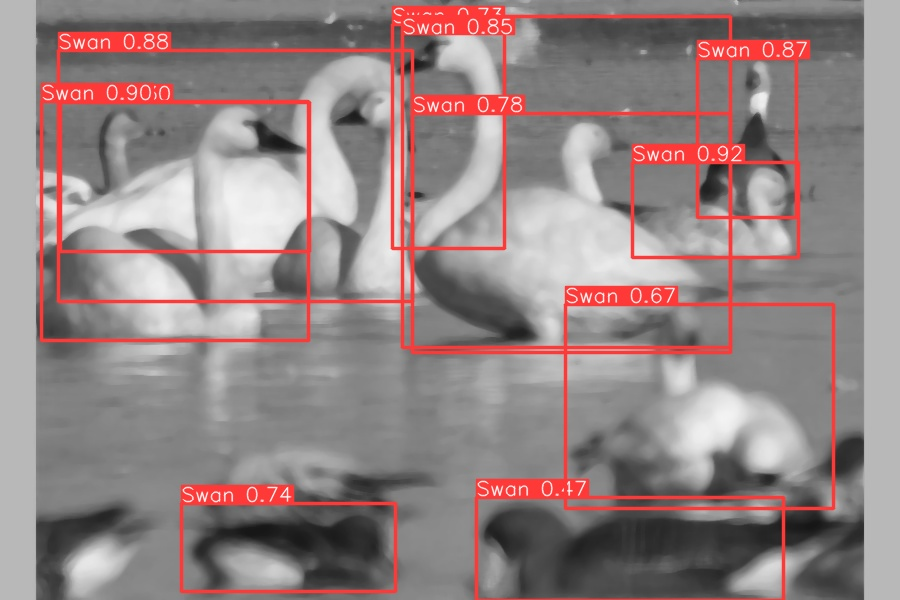

In [34]:
image_path = 'runs/detect/predict/bewick-0-3.jpg'
display(Image(filename=image_path, width=600))

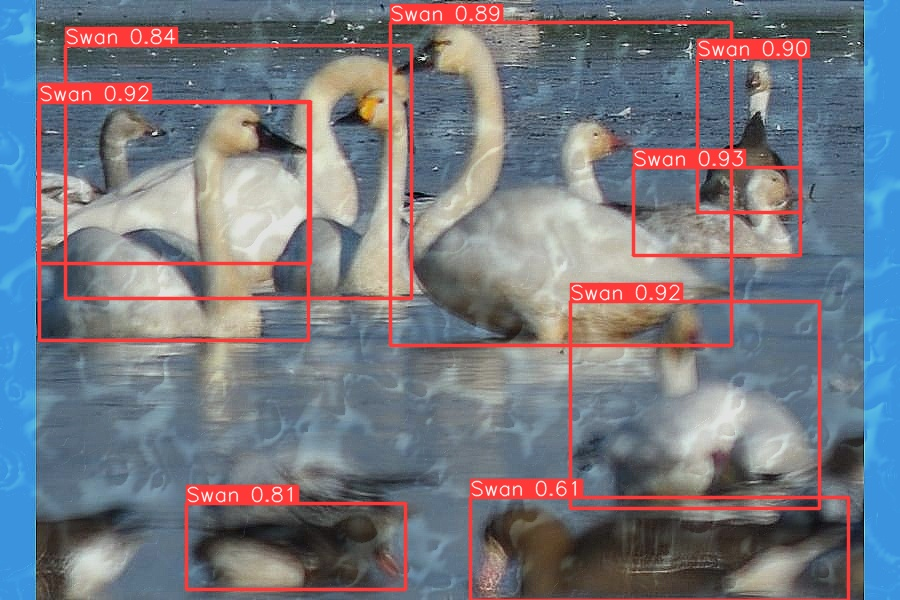

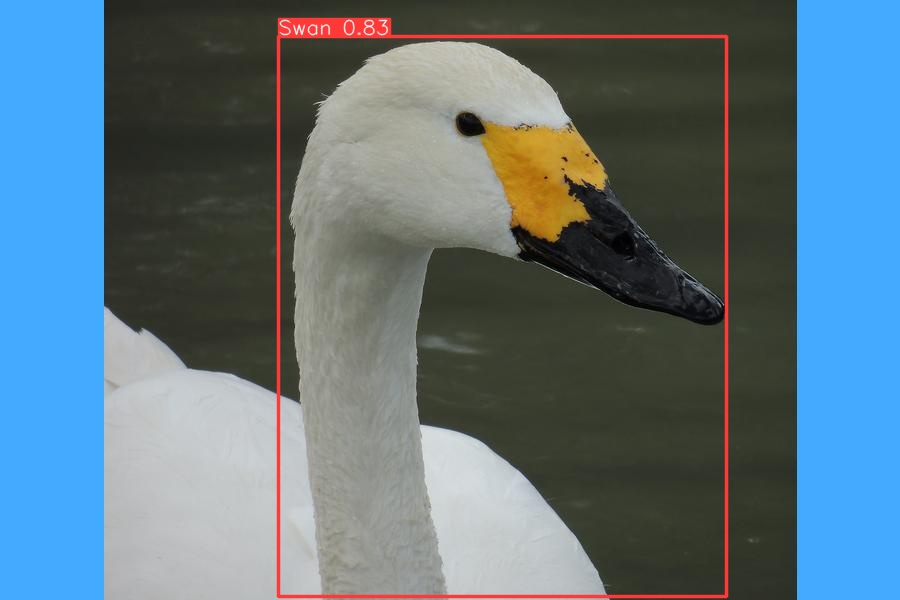

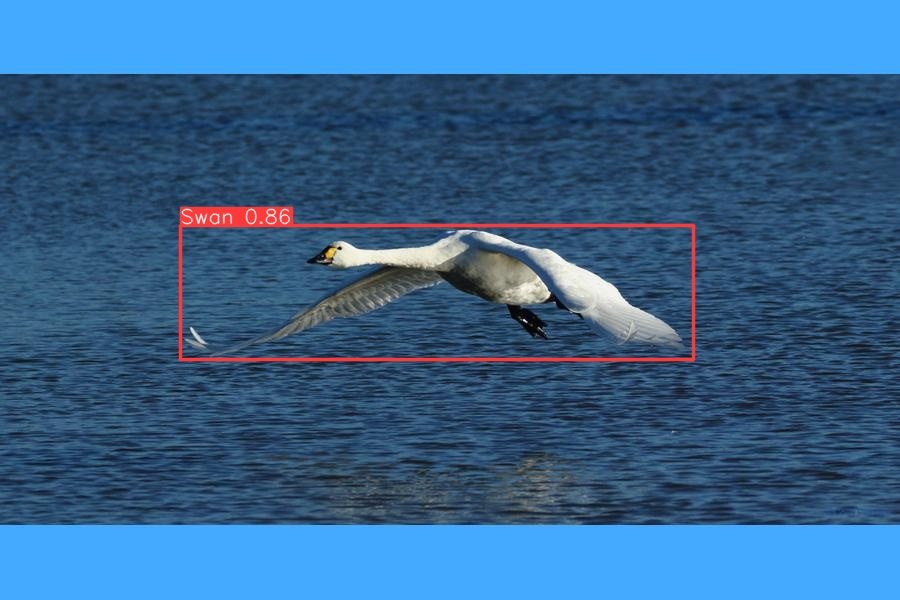

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")